In [16]:
import keras
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [3]:
input_img = Input(shape=(784,))

In [4]:
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
autoencoder=Model(input_img, decoded)

In [6]:
encoder = Model(input_img, encoded)

In [7]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total para

In [8]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.2442 - acc: 0.7857 - val_loss: 0.1630 - val_acc: 0.8019
Epoch 2/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.1491 - acc: 0.8052 - val_loss: 0.1390 - val_acc: 0.8085
Epoch 3/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1318 - acc: 0.8086 - val_loss: 0.1242 - val_acc: 0.8085
Epoch 4/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1213 - acc: 0.8103 - val_loss: 0.1162 - val_acc: 0.8099
Epoch 5/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.1153 - acc: 0.8112 - val_loss: 0.1117 - val_acc: 0.8111
Epoch 6/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.1111 - acc: 0.8117 - val_loss: 0.1083 - val_acc: 0.8116
Epoch 7/50
60000/60000 [==============================] - 1s 23us/step - loss: 0

In [11]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

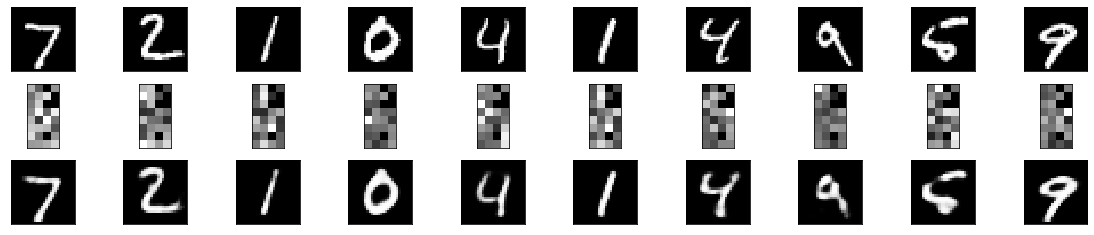

In [12]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

# Now again with Noise!

In [17]:
#loading only images and not their labels
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

X_train_noisy = X_train + np.random.normal(loc=0.0, scale=0.5, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

X_test_noisy = X_test + np.random.normal(loc=0.0, scale=0.5, size=X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

print(X_train_noisy.shape)
print(X_test_noisy.shape)

(60000, 784)
(10000, 784)


Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.6028 - acc: 0.3929 - val_loss: 0.5650 - val_acc: 0.4301
Epoch 2/150
60000/60000 [==============================] - 2s 41us/step - loss: 0.5646 - acc: 0.4308 - val_loss: 0.5644 - val_acc: 0.4302
Epoch 3/150
60000/60000 [==============================] - 2s 41us/step - loss: 0.5641 - acc: 0.4310 - val_loss: 0.5639 - val_acc: 0.4304
Epoch 4/150
60000/60000 [==============================] - 2s 41us/step - loss: 0.5636 - acc: 0.4312 - val_loss: 0.5634 - val_acc: 0.4306
Epoch 5/150
60000/60000 [==============================] - 2s 41us/step - loss: 0.5630 - acc: 0.4316 - val_loss: 0.5624 - val_acc: 0.4314
Epoch 6/150
60000/60000 [==============================] - 2s 41us/step - loss: 0.5613 - acc: 0.4330 - val_loss: 0.5599 - val_acc: 0.4339
Epoch 7/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.5583 - acc: 0.4359 - val_loss: 0.5566 - 

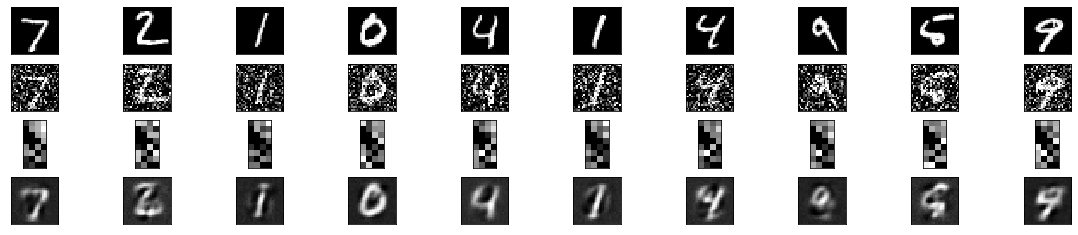

In [23]:
#Input image
input_img= Input(shape=(784,))

# encoded and decoded layer for the autoencoder
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

# Building autoencoder
autoencoder=Model(input_img, decoded)

#extracting encoder
encoder = Model(input_img, encoded)

# compiling the autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

tbCallBack = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=True, write_images=True , embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')
modelSaver = keras.callbacks.ModelCheckpoint("./logs/model.ckpt", monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

# Fitting the noise trained data to the autoencoder 
autoencoder.fit(X_train_noisy, X_train_noisy,
                epochs=150,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noisy, X_test_noisy), callbacks=[tbCallBack, modelSaver])

# reconstructing the image from autoencoder and encoder
encoded_imgs = encoder.predict(X_test_noisy)
predicted = autoencoder.predict(X_test_noisy)

# plotting the noised image, encoded image and the reconstructed image
plt.figure(figsize=(40, 4))
for i in range(10):
# display original images
    
    ax = plt.subplot(4, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
# display noised images
    ax = plt.subplot(4, 20, i + 1+20)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# display encoded images    
    ax = plt.subplot(4, 20, 2*20+i + 1 )
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# display reconstruction images
    ax = plt.subplot(4, 20, 3*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()